<a href="https://colab.research.google.com/github/iceman67/-Python/blob/master/UWB_KF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
fw = 10 # figure width

In [ ]:
import scipy.stats
from numpy import *

def normpdf(x, mu, sigma):
    u = (x-mu)/abs(sigma)
    y = (1/(sqrt(2*pi)*abs(sigma)))*exp(-u*u/2)
    return y

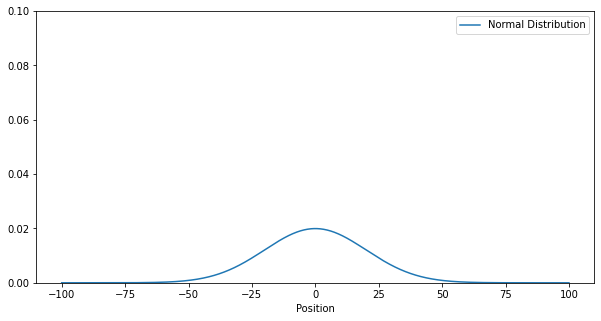

In [ ]:
# https://github.com/sharathsrini/Kalman-Filter-for-Sensor-Fusion/blob/master/Kalman_Filter.ipynb

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-100,100,1000)

mean0 = 0.0   # e.g. meters or miles
var0  = 20.0

plt.figure(figsize=(fw,5))
plt.plot(x, normpdf(x, mean0, var0), label='Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.xlabel('Position');

In [ ]:
meanMove = 25.0
varMove  = 10.0 

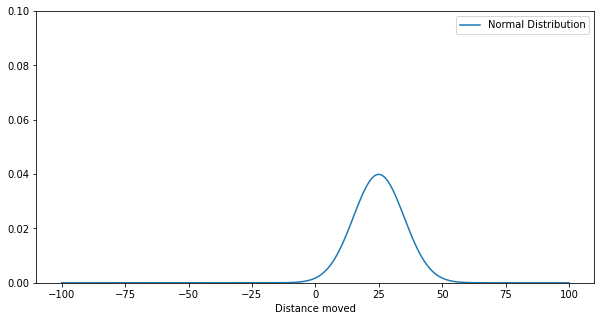

In [ ]:
plt.figure(figsize=(fw,5))
plt.plot(x, normpdf(x, meanMove, varMove), label='Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.xlabel('Distance moved');

In [ ]:
def predict(var, mean, varMove, meanMove):
    new_var = var + varMove
    new_mean= mean+ meanMove
    return new_var, new_mean
    

In [ ]:
new_var, new_mean = predict(var0, mean0, varMove, meanMove)

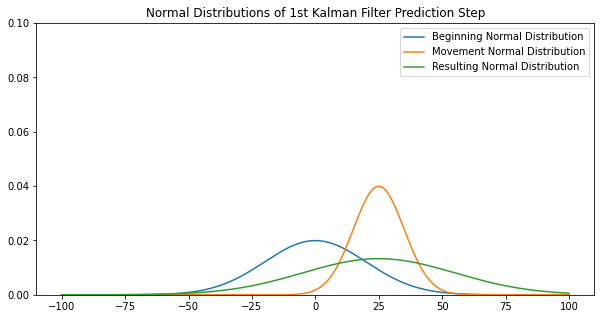

In [ ]:
plt.figure(figsize=(fw,5))
plt.plot(x,normpdf(x, mean0, var0), label='Beginning Normal Distribution')
plt.plot(x,normpdf(x, meanMove, varMove), label='Movement Normal Distribution')
plt.plot(x,normpdf(x, new_mean, new_var), label='Resulting Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.title('Normal Distributions of 1st Kalman Filter Prediction Step');
plt.savefig('Kalman-Filter-1D-Step.png', dpi=150)

In [ ]:
meanSensor = 25.0
varSensor  = 12.0

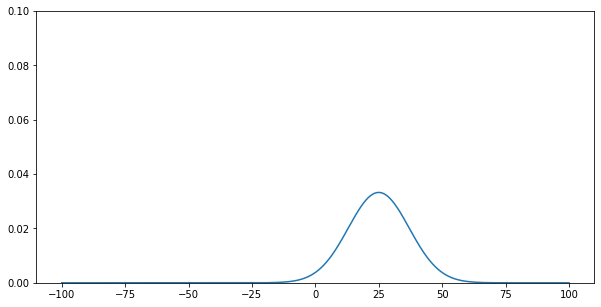

In [ ]:
plt.figure(figsize=(fw,5))
plt.plot(x, normpdf(x, meanSensor, varSensor))
plt.ylim(0, 0.1);

In [ ]:
def correct(var, mean, varSensor, meanSensor):
    new_mean=(varSensor*mean + var*meanSensor) / (var+varSensor)
    new_var = 1/(1/var +1/varSensor)
    return new_var, new_mean

In [ ]:
var, mean = correct(new_var, new_mean, varSensor, meanSensor)

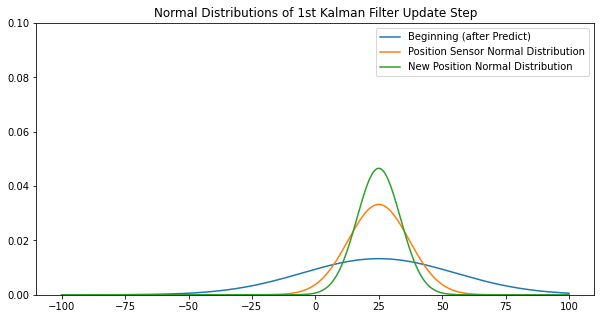

In [ ]:
plt.figure(figsize=(fw,5))
plt.plot(x, normpdf(x, new_mean, new_var), label='Beginning (after Predict)')
plt.plot(x, normpdf(x, meanSensor, varSensor), label='Position Sensor Normal Distribution')
plt.plot(x, normpdf(x, mean, var), label='New Position Normal Distribution')
plt.ylim(0, 0.1);
plt.legend(loc='best');
plt.title('Normal Distributions of 1st Kalman Filter Update Step');

!pip install *filterpy*

preliminary
* The mean is usually denoted by a Greek letter $μ$.
* The expected value is usually denoted by letter $E$.
* An Estimate is about evaluating the hidden state of the system. 
* Every measured or computed parameter is an estimate.

performance index
* Accuracy indicates how close the measurement is to the true value
* Precision describes how much variability there is in a number of measurements of the same parameter



In [ ]:
# python code to calculate expected
# value of an array

# Function to calculate expectation
def calc_Expectation(a, n):
	
	# variable prb is for probability
	# of each element which is same for
	# each element
	prb = 1 / n
	
	# calculating expectation overall
	sum = 0
	for i in range(0, n):
		sum += (a[i] * prb)
		
	# returning expectation as sum
	return float(sum)


# Driver program
n = 6;
a = [ 1.0, 2.0, 3.0,4.0, 5.0, 6.0 ]

# Function for calculating expectation
expect = calc_Expectation(a, n)

# Display expectation of given array
print( "Expectation of array E(X) is : ",
								expect )

# This code is contributed by Sam007


Expectation of array E(X) is :  3.5


Let's try a randomly chosen number to scale our estimate: $4/10$ 
The difference between the measurement and prediction is called the $residual$ 
 


In [ ]:
import matplotlib.pyplot as plt

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step = 1.0  # day
scale_factor = 4.0/10


def print_results(estimates, predicted_weight, estimated_weight):
    print (f'predicted_weight={predicted_weight:.2f}, estimated_weight={estimated_weight:.2f} ')

def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):     
    # storage for the filtered results
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements
    for z in weights: 
        # predict new position
        predicted_weight = estimated_weight + gain_rate * time_step

        # update filter 
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)

        # save and log
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            print_results(estimates, predicted_weight, estimated_weight)

    return estimates, predictions

initial_estimate = 160.
estimates, predictions = predict_using_gain_guess(
    estimated_weight=initial_estimate, gain_rate=1, do_print=True)  


predicted_weight=161.00, estimated_weight=159.80 
predicted_weight=160.80, estimated_weight=162.16 
predicted_weight=163.16, estimated_weight=162.02 
predicted_weight=163.02, estimated_weight=161.77 
predicted_weight=162.77, estimated_weight=162.50 
predicted_weight=163.50, estimated_weight=163.94 
predicted_weight=164.94, estimated_weight=166.80 
predicted_weight=167.80, estimated_weight=167.64 
predicted_weight=168.64, estimated_weight=167.75 
predicted_weight=168.75, estimated_weight=169.65 
predicted_weight=170.65, estimated_weight=170.87 
predicted_weight=171.87, estimated_weight=172.16 


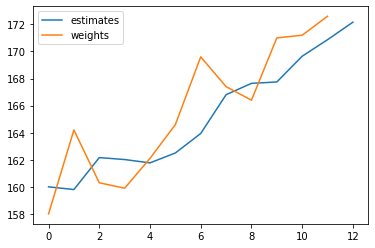

In [ ]:
import numpy as np

estimates = np.array(estimates)
weights = np.array(weights)
redidual = np.array (weights- estimates[1:])

plt.plot(estimates, label ="estimates")
plt.plot(weights, label ="weights")
#plt.plot(redidual, label ="redidual")
plt.legend(loc="upper left")


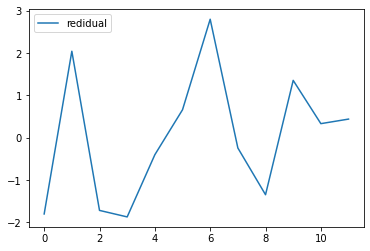

In [ ]:
plt.plot(redidual, label ="redidual")
plt.legend(loc="upper left")

In [ ]:
weight = 160.  # initial guess
gain_rate = -1.0  # initial guess

time_step = 1.
weight_scale = 4./10
gain_scale = 1./3
estimates = [weight]
predictions = []

for z in weights:
    # prediction step
    weight = weight + gain_rate*time_step
    gain_rate = gain_rate
    predictions.append(weight)
    
    # update step    
    residual = z - weight
    
    gain_rate = gain_rate + gain_scale   * (residual/time_step)
    weight    = weight    + weight_scale * residual
  
    estimates.append(weight)

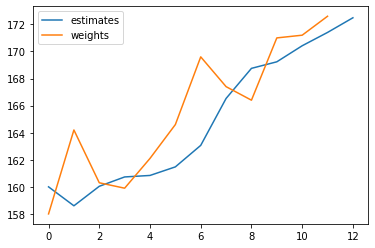

In [ ]:
plt.plot(estimates, label ="estimates")
plt.plot(weights, label ="weights")
#plt.plot(redidual, label ="redidual")
plt.legend(loc="upper left")


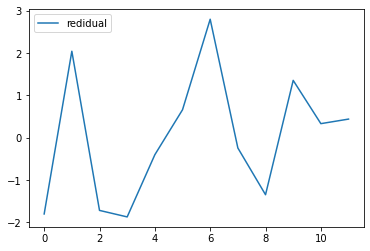

In [ ]:
plt.plot(redidual, label ="redidual")
plt.legend(loc="upper left")

In [ ]:
def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        results.append(x_est)
    return np.array(results)
data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
 

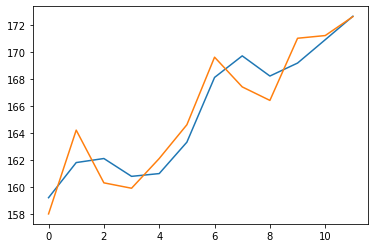

In [ ]:
plt.plot(data, label ="estimates")
plt.plot(weights)

recall that  is the scale factor for choosing between the measurement and prediction

In [ ]:
from numpy.random import randn
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + randn()*noise_factor for i in range(count)]

measurements = gen_data(0, 1, 30, 1)
data = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.2, h=0.02)

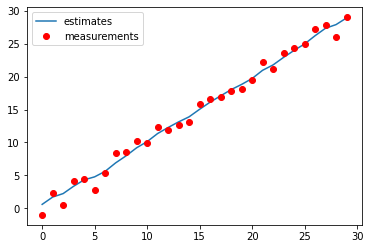

In [ ]:
plt.plot(data, label ="estimates")
plt.plot(measurements, "ro", label ="measurements")
plt.legend(loc="upper left")

In [ ]:
data = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.9, h=0.02)

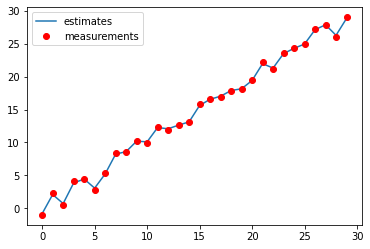

In [ ]:
plt.plot(data, label ="estimates")
plt.plot(measurements, "ro", label ="measurements")
plt.legend(loc="upper left")

Tracking of mobile in wireless network 

* $X$ : The mean state estimate of the previous step ( k−1).
* $P$  : The state covariance of previous step ( k−1).
* $A$ : The transition n $\times$ n  matrix.
* $Q$ : The process noise covariance matrix.
* $B$ : The input effect matrix.
* $U$ : The control input. 


* https://towardsdatascience.com/kalman-filter-interview-bdc39f3e6cf3


In [ ]:
from numpy import dot
import numpy as np

def kf_predict(X, P, A, Q, B, U):
    X = np.dot(A, X) + np.dot(B, U) # predicted mean of the state,
    P = np.dot(A, np.dot(P, A.T)) + Q # predicted covariance of the state,
    return(X,P)

In [ ]:
def kf_update(X, P, Y, H, R):
    IM = dot(H, X) # IM : the Mean of predictive distribution of Y
    IS = R + dot(H, dot(P, H.T)) # IS : the Covariance or predictive mean of Y
    K = dot(P, dot(H.T, inv(IS)))
    X = X + dot(K, (Y-IM))
    P = P - dot(K, dot(IS, K.T))
    LH = gauss_pdf(Y, IM, IS) # LH : the Predictive probability (likelihood) of measurement 
    return (X,P,K,IM,IS,LH)


def gauss_pdf(X, M, S):
    if M.shape[1] == 1:
        DX = X - tile(M, X.shape[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(np.linalg.det(S))
        P = exp(-E)
    elif X.shape[1] == 1:
        DX = tile(X, M.shape[1])- M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(np.linalg.det(S))
        P = exp(-E)
    else:
        DX = X-M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(np.linalg.det(S))
        P = exp(-E)
        
    return (P[0],E[0]) 

In [ ]:
from numpy import *
from numpy.linalg import inv
#time step of mobile movement
dt = 0.1
# Initialization of state matrices
X = np.array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
Q = np.eye(X.shape[0])
B = eye(X.shape[0])
U = zeros((X.shape[0],1))

In [ ]:
# Measurement matrices
import matplotlib.pyplot as plt
Y = np.array([[X[0,0] + abs(np.random.randn(1)[0])], [X[1,0] + abs(np.random.randn(1)[0])]])
#print (f"initial Y : {Y}")
H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape[0])
# Number of iterations in Kalman Filter
N_iter = 50
# Applying the Kalman Filter

result = []
input =[]
for i in arange(0, N_iter):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    #print (f"X={X}")
    #print (f"P={P}")
    input.append(Y[0])
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y = array([[X[0,0] + abs(0.2 * np.random.randn(1)[0])],[X[1, 0] + abs(0.1 * np.random.randn(1)[0])]]) # 0.1 => 0.2
    result.append(Y[0])

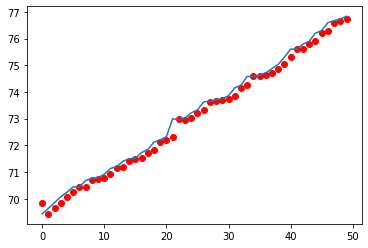

In [ ]:
import matplotlib.pyplot as plt
plt.plot(input, "ro")
plt.plot(result )

$h$ affects how much we favor the measurement of $\hat{x}$ vs our prediction
> a large $h$ will cause us to react to those transient changes rapidly. A smaller $h$ will cause us to react more slowly.



In [ ]:
from numpy.random import randn
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + randn()*noise_factor for i in range(count)]

measurements = gen_data(0, 1, 30, 1)
data_02 = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.2, h=0.02)
data_4 = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.2, h=0.4)

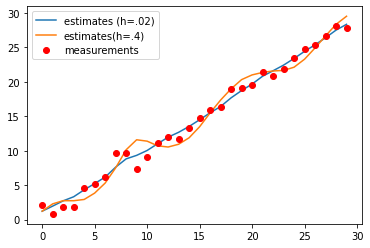

In [ ]:
plt.plot(data_02, label ="estimates (h=.02)")
plt.plot(data_4, label ="estimates(h=.4)")
plt.plot(measurements, "ro", label ="measurements")
plt.legend(loc="upper left")

평균 필터

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [ ]:
def avg_filter(k, x_meas, x_avg):
    """평균필터 사용하여 전압 평균 계산"""
    alpha = (k - 1) / k
    x_avg = alpha * x_avg + (1 - alpha) * x_meas
    return x_avg

In [ ]:
def get_volt():
    """전압 평균"""
    v = np.random.normal(0, 4)  # v: 잡음 평균(노이즈)
    volt_mean = 14.4            # volt_mean: 측정하는 전압의 평균(기준값)
    volt_meas = volt_mean + v   # volt_meas: 식별가능한 전압 평균 [V] (기준값 + 잡음)
    return volt_meas

In [ ]:
# Input parameters. (측정시간, 측정간격)
time_end = 10
dt = 0.2

In [ ]:
# 값을 저장할 공간(array) 생성
time = np.arange(0, time_end, dt)
n_samples = len(time)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [ ]:
x_avg = 0
for i in range(n_samples):
    k = i + 1
    x_meas = get_volt()
    x_avg = avg_filter(k, x_meas, x_avg)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

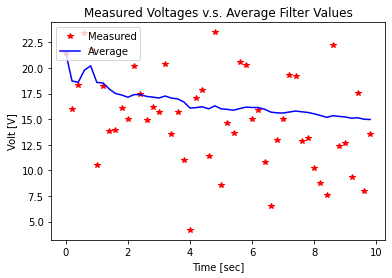

In [ ]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Average')
plt.legend(loc='upper left')
plt.title('Measured Voltages v.s. Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Volt [V]')
plt.show()

* 재귀식인 평균필터 사용하면, 직전평균값과 데이터개수만으로 쉽게 평균값 도출 가능
* 데이터가 순차적으로 입력될 경우 효과적 (데이터 실시간 처리 등 여러 면에서 유용)
* 평균을 취함으로써 잡음이 제거되는 효과 있음

공 이미지를 추적하는 예제
> https://github.com/JeongMinHyeok/Kalman_Filter/blob/masterChapter10_ObjectTrackingKF.ipynb

In [ ]:
import numpy as np

A = np.array([[90, 80, 40],
              [90, 60, 80],
              [60, 50, 70],
              [30, 40, 70],
              [30, 20, 90]])

ones = np.ones([5, 5])
deviation = A - (ones.dot(A) / len(A))
covariance = deviation.T.dot(deviation)

In [ ]:
covariance

array([[ 3600.,  2400., -1200.],
       [ 2400.,  2000., -1400.],
       [-1200., -1400.,  1400.]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import inv
from skimage.metrics import structural_similarity
 
np.random.seed(0)
def kalman_filter(z_meas, x_esti, P):
    """칼만필터 알고리즘 (매개변수 : 측정값, 추정값, 오차공분산)"""
    # (1) Prediction.
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T + Q
 
    # (2) Kalman Gain.
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)
 
    # (3) Estimation.
    x_esti = x_pred + K @ (z_meas - H @ x_pred)
 
    # (4) Error Covariance.
    P = P_pred - K @ H @ P_pred
 
    return x_esti, P

In [ ]:
def get_ball_pos(iimg=0):
    """Return measured position of ball by comparing with background image file.
        - References:
        (1) Data Science School:
            https://datascienceschool.net/view-notebook/f9f8983941254a34bf0fee42c66c5539
        (2) Image Diff Calculation:
            https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python
    """    
    # Read images.
    imageA = cv2.imread('./data/10.TrackKalman/Img/bg.jpg')
    imageB = cv2.imread('./data/10.TrackKalman/Img/{}.jpg'.format(iimg+1))
 

    # Convert the images to grayscale.
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
 
    # 두 이미지 사이의 구조적 유사성 지수(SSIM) 계산, 차이 이미지가 반환되는지 확인.
    _, diff = structural_similarity(grayA, grayB, full=True)
    diff = (diff * 255).astype('uint8') 

      # 서로 다른 두 이미지(배경, 공)의 영역을 구하기 위해 이미지 임계값 지정 후 윤곽선 찾기 
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    M = cv2.moments(contours[0])
    xc = int(M['m10'] / M['m00'])  # center of x as true position.
    yc = int(M['m01'] / M['m00'])  # center of y as true position.
 
    v = np.random.normal(0, 15)  # v: 위치의 측정잡음
 
    xpos_meas = xc + v  # x_pos_meas: 위치x의 측정값 (observable). 
    ypos_meas = yc + v  # y_pos_meas: 위치y의 측정값 (observable). 
 
    return np.array([xpos_meas, ypos_meas])


# Input parameters.
n_samples = 24
dt = 1
 
 
# Initialization for system model.
# Matrix: A, H, Q, R, P_0
# Vector: x_0
A = np.array([[ 1, dt,  0,  0],
              [ 0,  1,  0,  0],
              [ 0,  0,  1, dt],
              [ 0,  0,  0,  1]])
H = np.array([[ 1,  0,  0,  0],
              [ 0,  0,  1,  0]])
Q = 1.0 * np.eye(4)
R = np.array([[50,  0],
              [ 0, 50]])
 
# Initialization for estimation.
x_0 = np.array([0, 0, 0, 0])  # (x-pos, x-vel, y-pos, y-vel) by definition in book. / 추정값 초기위치
P_0 = 100 * np.eye(4)

xpos_meas_save = np.zeros(n_samples)
ypos_meas_save = np.zeros(n_samples)
xpos_esti_save = np.zeros(n_samples)
ypos_esti_save = np.zeros(n_samples)
# 칼만필터 실행
x_esti, P = None, None
for i in range(n_samples):
    z_meas = get_ball_pos(i)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)
 
    xpos_meas_save[i] = z_meas[0]
    ypos_meas_save[i] = z_meas[1]
    xpos_esti_save[i] = x_esti[0]
    ypos_esti_save[i] = x_esti[2]

* Kalman filter gives better estimates of the x- and y-position than if one were to just use the raw measurements


> https://towardsdatascience.com/wtf-is-sensor-fusion-part-2-the-good-old-kalman-filter-3642f321440

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

X = np.array([[13.04681517, 14.74115241],[13.40852019, 13.7632696 ],[14.19591481, 15.85318113],[14.91470077, 16.17425987]])

def est_gaus_par(X):
    mu = np.mean(X,axis=0)
    sig = np.std(X,axis=0)
    return mu,sig

mu,sigma = est_gaus_par(X)

def est_mult_gaus(X,mu,sigma):
    m = len(mu)
    sigma2 = np.diag(sigma)
    X = X-mu.T
    p = 1/((2*np.pi)**(m/2)*np.linalg.det(sigma2)**(0.5))*np.exp(-0.5*np.sum(X.dot(np.linalg.pinv(sigma2))*X,axis=1))

    return p

p = est_mult_gaus(X, mu, sigma)

print (p)

[0.10800608 0.06099948 0.13705282 0.05261222]


In [ ]:
# Import packages
import numpy as np
from scipy.stats import multivariate_normal

# Prepare your data
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x,y)

# Get the multivariate normal distribution
mu_x = np.mean(x)
sigma_x = np.std(x)
mu_y = np.mean(y)
sigma_y = np.std(y)
rv = multivariate_normal([mu_x, mu_y], [[sigma_x, 0], [0, sigma_y]])

# Get the probability density
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
pd = rv.pdf(pos)
pd

array([[8.55737326e-10, 9.16999380e-10, 9.82374343e-10, ...,
        9.82374343e-10, 9.16999380e-10, 8.55737326e-10],
       [9.16999380e-10, 9.82647171e-10, 1.05270231e-09, ...,
        1.05270231e-09, 9.82647171e-10, 9.16999380e-10],
       [9.82374343e-10, 1.05270231e-09, 1.12775185e-09, ...,
        1.12775185e-09, 1.05270231e-09, 9.82374343e-10],
       ...,
       [9.82374343e-10, 1.05270231e-09, 1.12775185e-09, ...,
        1.12775185e-09, 1.05270231e-09, 9.82374343e-10],
       [9.16999380e-10, 9.82647171e-10, 1.05270231e-09, ...,
        1.05270231e-09, 9.82647171e-10, 9.16999380e-10],
       [8.55737326e-10, 9.16999380e-10, 9.82374343e-10, ...,
        9.82374343e-10, 9.16999380e-10, 8.55737326e-10]])

(-4.020958198090635, 4.231905764190144, -42.3957768412569, 42.77042250478631)

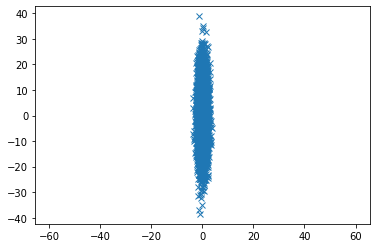

In [ ]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance

import matplotlib.pyplot as plt

x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')


(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)


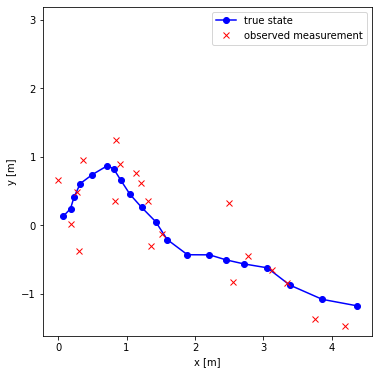

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class MotionModel():
    def __init__(self, A, Q):
        self.A = A
        self.Q = Q

        (m, _) = Q.shape
        self.zero_mean = np.zeros(m)

    def __call__(self, x):
        new_state = self.A @ x + np.random.multivariate_normal(self.zero_mean, self.Q)
        return new_state


class MeasurementModel():
    def __init__(self, H, R):
        self.H = H
        self.R = R

        (n, _) = R.shape
        self.zero_mean = np.zeros(n)

    def __call__(self, x):
        measurement = self.H @ x + np.random.multivariate_normal(self.zero_mean, self.R)
        return measurement


def create_model_parameters(T=1, s2_x=0.1 ** 2, s2_y=0.1 ** 2, lambda2=0.3 ** 2):
    # Motion model parameters
    F = np.array([[1, T],
                  [0, 1]])
    base_sigma = np.array([[T ** 3 / 3, T ** 2 / 2],
                           [T ** 2 / 2, T]])

    sigma_x = s2_x * base_sigma
    sigma_y = s2_y * base_sigma

    zeros_2 = np.zeros((2, 2))
    A = np.block([[F, zeros_2],
                  [zeros_2, F]])
    Q = np.block([[sigma_x, zeros_2],
                  [zeros_2, sigma_y]])

    # Measurement model parameters
    H = np.array([[1, 0, 0, 0],
                  [0, 0, 1, 0]])
    R = lambda2 * np.eye(2)

    return A, H, Q, R


def simulate_system(K, x0):
    (A, H, Q, R) = create_model_parameters()

    # Create models
    motion_model = MotionModel(A, Q)
    meas_model = MeasurementModel(H, R)

    (m, _) = Q.shape
    (n, _) = R.shape

    state = np.zeros((K, m))
    meas = np.zeros((K, n))

    # initial state
    x = x0
    for k in range(K):
        x = motion_model(x)
        z = meas_model(x)

        state[k, :] = x
        meas[k, :] = z
        #print (f'x={x}')
        #print (f'z={z}')

    return state, meas


if __name__ == '__main__':
    np.random.seed(21)
    (state, meas) = simulate_system(K=20, x0=np.array([0, 0.1, 0, 0.1]))

    plt.figure(figsize=(7, 5))
    plt.plot(state[:, 0], state[:, 2], '-bo')
    plt.plot(meas[:, 0], meas[:, 1], 'rx')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.legend(['true state', 'observed measurement'])
    plt.axis('square')
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
import numpy as np


class KalmanFilter():
    def __init__(self, A, H, Q, R, x_0, P_0):
        # Model parameters
        self.A = A
        self.H = H
        self.Q = Q
        self.R = R

        # Initial state
        self._x = x_0
        self._P = P_0

    def predict(self):
        self._x = self.A @ self._x
        self._P = self.A @ self._P @ self.A.transpose() + self.Q

    def update(self, z):
        self.S = self.H @ self._P @ self.H.transpose() + self.R
        self.V = z - self.H @ self._x
        self.K = self._P @ self.H.transpose() @ np.linalg.inv(self.S)

        self._x = self._x + self.K @ self.V
        self._P = self._P - self.K @ self.S @ self.K.transpose()

    def get_state(self):
        return self._x, self._P

[]

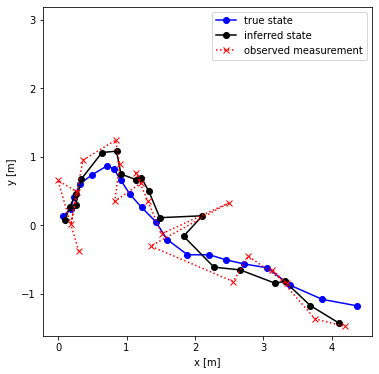

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#from kalman_filter import KalmanFilter
#from simulate_model import simulate_system, create_model_parameters

np.random.seed(21)
(A, H, Q, R) = create_model_parameters()
K = 20
# initial state
x = np.array([0, 0.1, 0, 0.1])
P = 0 * np.eye(4)

(state, meas) = simulate_system(K, x)
kalman_filter = KalmanFilter(A, H, Q, R, x, P)

est_state = np.zeros((K, 4))
est_cov = np.zeros((K, 4, 4))

for k in range(K):
    kalman_filter.predict()
    kalman_filter.update(meas[k, :])
    (x, P) = kalman_filter.get_state()

    est_state[k, :] = x
    est_cov[k, ...] = P

plt.figure(figsize=(7, 5))
plt.plot(state[:, 0], state[:, 2], '-bo')
plt.plot(est_state[:, 0], est_state[:, 2], '-ko')
plt.plot(meas[:, 0], meas[:, 1], ':rx')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(['true state', 'inferred state', 'observed measurement'])
plt.axis('square')
plt.tight_layout(pad=0)
plt.plot()

In [ ]:
!pip install filterpy

     |████████████████████████████████| 177 kB 14.3 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=c3d4ec90b8325fcded04d9f9bfb1214412400e738c81b09b6492c86473e921ab
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy


1960년대 초 루돌프 칼만이 개발한 알고리즘,  NASA의 아폴로 프로젝트에서 네비게이션 개발 등 다양하게 사용됨 
* 잡음이 포함되어 있는 측정치를 바탕으로 선형 역학계의 상태를 추정
* 각 시간에서의 상태 벡터는 이전 시간의 상태 벡터를 통해서 결정된다는 마르코프 연쇄를 가정함

Kalman filter는 로봇의 state를 추정하기 위해 가장 흔히 사용되는 방법 (2단계로 이루어짐)
*   control input에 의한 prediction 단계
*   센서의 observation를 이용한 correction 단계

---

* Prediction 단계는 직관적으로 t-1의 평균은 motion model을 통해 t의 평균으로 계산됨
* Correction 단계에서는 새로운 변수인 K(Kalman gain)이 추가됨

> 칼만 필터는 상태 예측(state prediction)과 측정 업데이트(measurement update)를 반복적으로 수행됨

* 상태 예측단계는 이전  파라미터(위치, 속도 등)와 측정값을 이용해 현재  파라미터 값을 예측하는 단계
* 측정 업데이트는 상태 예측단계에서 예측된 현재 파라미터 값과 현재 위치에서 얻어진 센서 정보를 이용해 현재 파라미터 값을 업데이트


$\hat{x}_{n,n}$ =$\hat{x}_{n,n-1}$+$α_{n}$ ($z_n$−$\hat{x}_{n,n-1})$

* $\hat{x}_{n,n-1}$  is the predicted state of $x$ at the time $N$, based on the measurement at time $N−1$
* $z_n$−$\hat{x}_{n,n-1}$  is the "measurement" residual

* https://www.kalmanfilter.net/alphabeta.html


In [ ]:
def measurement_update(estimated_mean, estimated_var, measurement_mean, measurement_var):
    new_mean = (measurement_var * estimated_mean + estimated_var * measurement_mean) / (estimated_var + measurement_var)
    new_var = estimated_var * measurement_var/(estimated_var + measurement_var)
    return new_mean, new_var

def state_prediction(estimated_mean, estimated_var, motion_control_mean, motion_control_var):
    new_mean = estimated_mean + motion_control_mean
    new_var  = estimated_var + motion_control_var
    return new_mean, new_var

if __name__ == "__main__":

    measurements = [5, 6, 7, 9, 10]
    measurement_var = 4;

    motion_control = [1, 1, 2, 1, 1]
    motion_control_var = 2

    mu = 0;
    sig = 1000;

    for i in range(5):
        mu, sig = state_prediction(mu, sig, motion_control[i], motion_control_var)
        print("predict: [%f %f]" % (mu, sig))
        mu, sig = measurement_update(mu, sig, measurements[i], measurement_var)
        print("udpate: [%f %f]" % (mu, sig))

predict: [1.000000 1002.000000]
udpate: [4.984095 3.984095]
predict: [5.984095 5.984095]
udpate: [5.993628 2.397451]
predict: [7.993628 4.397451]
udpate: [7.473300 2.094660]
predict: [8.473300 4.094660]
udpate: [8.739730 2.023388]
predict: [9.739730 4.023388]
udpate: [9.870244 2.005830]


In [ ]:
# Multi dimensional Kalman filter
import numpy as np

def kalman_filter(mu, sig):
    for n, measurement in enumerate(measurements):
        # prediction
        mu_bar = A * mu + B * u
        sig_bar = A * sig * A.transpose()

        # measurement update
        s = C * sig_bar * C.transpose() + Q
        K = sig_bar * C.transpose() * np.linalg.inv(s)

        z = np.matrix([[measurement]])
        mu = mu_bar + K * (z - C * mu_bar)
        sig = (I - K * C) * sig_bar
    return mu, sig


measurements = [1, 2, 3, 4, 5]

mu = np.matrix([[0.], [0.]])  # initial state (location and velocity)
sig = np.matrix([[1000., 0.],
                 [0., 1000.]])  # initial uncertainty
u = np.matrix([[0.], [0.]])  # external motion
A = np.matrix([[1., 1.],
               [0, 1.]])  # next state function
C = np.matrix([[1., 0.]])  # measurement function
Q = np.matrix([[1.]])  # measurement uncertainty
I = np.eye(2)
B = np.eye(2)

print(kalman_filter(mu, sig))

(matrix([[4.99980014],
        [0.9999001 ]]), matrix([[0.59980023, 0.19986016],
        [0.19986016, 0.09990012]]))


In [3]:
!pip install filterpy

     |████████████████████████████████| 177 kB 10.4 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=242a2a8d5028d28b0e6d98ef29a185c45eef41f0cbef0382143b306b6e2c722a
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy


In [4]:
import time

import numpy as np
import pandas as pd
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
from numpy import array, asarray
import matplotlib.pyplot as plt

> https://www.analyticsvidhya.com/blog/2021/10/an-intuition-about-kalman-filter/

* 불확실한 측정값을 이용하여 미지의 값을 예측 하는것
* 칼만필터는 전체 측정값이 아니라 현재의 측정값과 이전의 계산된 상태(예측)값만 필요로 한다

---



In [5]:

my_filter = KalmanFilter(dim_x=2, dim_z=1)
my_filter.x = np.array([[2.],
                [0.]])       # initial state (location and velocity)
my_filter.F = np.array([[1.,1.],
                [0.,1.]])    # state transition matrix

my_filter.H = np.array([[1.,0.]])    # Measurement function
my_filter.P *= 1000.                 # covariance matrix
my_filter.R = 5                      # state uncertainty
dt = 0.1
my_filter.Q = Q_discrete_white_noise(2, dt, .1)  # process uncertainty

In [6]:
from google.colab import  drive
drive.mount('/content/data')

Mounted at /content/data


In [7]:
def plot_kf(xs_scaled, xs):
    fname = '/content/data/My Drive/Colab Notebooks/data/fig1.png'
    plt.subplot(211)
    plt.plot(xs_scaled[:], label='measurements')
    plt.plot(xs[:, 0], label='estimated by KF')
    plt.legend(loc=4)

    plt.subplot(212)
    plt.plot(xs_scaled[:], label='measurements')
    plt.plot(xs[:, 1], label='estimation error')
    plt.legend(loc=4)
    plt.savefig(fname, dpi=300)
    plt.show()

* 연속된 측정값에서 모르는 변수들을 예측(estimates) 할때 사용함
* Bayesian inference을 이용하여 변수들의 결합확률분포 예측함
* 칼만필터는 변수들을 예측 하기 위해 mean vector 와 co-variance matrix를 유지함

In [8]:
def write_kf(xOberv, xRef):
    df = pd.DataFrame( {'observation' : xOberv, 'reference' : xRef})
    df['error'] = df['observation'] - df['reference']
    out_file = "/content/data/My Drive/Colab Notebooks/data/kf_eval.csv"
    df.to_csv(out_file,index=False)

In [9]:
def main(df,ct=20): 
    i = 0
    xs_scaled = []
    xs = []
    while True:
       my_filter.predict()
       my_filter.update(df['raw'][i])
       xs_scaled.append(df['raw'][i])
       # do something with the output
       x = my_filter.x
       # estimatinting value
       # print(x)
       xs.append(x)
       if i < ct:
          i = i + 1
       else:
          break
       #print(i)
       time.sleep(0.0001)

    xs_scaled = asarray(xs_scaled)
    xs = asarray(xs)

    plot_kf(xs_scaled, xs)
   
    y, _ = xs[:, 0], xs[:, 1]
    # print (y.shape, ", ",  xs_scaled.shape)
    write_kf(xs_scaled, y.flatten())


In [10]:
raw_file = "/content/data/My Drive/Colab Notebooks/data/UWB-0722.csv"
#df = pd.read_csv(raw_file, index_col = "no")
df = pd.read_csv(raw_file)

In [11]:
df.head()

,no,timestamp,node,error,raw,filtered,rssi
0,1,26806,00000000a3c3,2,0.00,NaN,127
1,2,27318,00000000a3c3,0,23.16,23.1600,-75
2,3,27813,00000000a3c3,0,21.36,21.7078,-75
3,4,28309,00000000a3c3,2,0.00,21.7078,127
4,5,28821,00000000a3c3,0,21.63,20.8940,-77


RSSI 값의 범위

In [12]:
df['rssi'].min()

-95

In [13]:
df['rssi'].max()

127

In [14]:
df['rssi'].mean()

-51.27272727272727

351


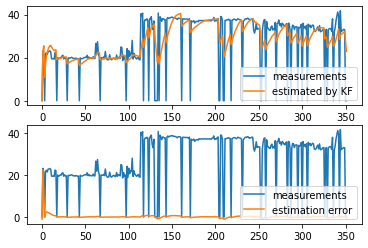

In [15]:
#ct =100
ct = len(df) -1
print (ct)
main(df,ct)

* 실험참여 노드 식별

In [ ]:
df['node'].unique()

array(['00000000a3c3'], dtype=object)

* error 와 RSSI 는 양의 상관관계를 가짐

In [ ]:
df.corr()

,timestamp,error,raw,filtered,rssi
timestamp,1.000000,0.023544,0.345609,0.636034,-0.004962
error,0.023544,1.000000,-0.778867,0.112657,0.972710
raw,0.345609,-0.778867,1.000000,0.493565,-0.773787
filtered,0.636034,0.112657,0.493565,1.000000,0.139451
rssi,-0.004962,0.972710,-0.773787,0.139451,1.000000


In [ ]:
gdf = df.groupby(df['node'])

In [ ]:
gdf.head()

,no,timestamp,node,error,raw,filtered,rssi
0,1,26806,00000000a3c3,2,0.00,NaN,127
1,2,27318,00000000a3c3,0,23.16,23.1600,-75
2,3,27813,00000000a3c3,0,21.36,21.7078,-75
3,4,28309,00000000a3c3,2,0.00,21.7078,127
4,5,28821,00000000a3c3,0,21.63,20.8940,-77


* create moving-averages

In [ ]:
df['MA10'] = df['raw'].rolling(10).mean()
df['MA48'] = df['raw'].rolling(48).mean()
df['MA336'] = df['raw'].rolling(336).mean()


In [ ]:
df.size

3520

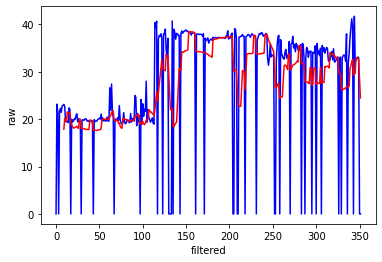

In [ ]:
x = np.arange(df.shape[0])
plt.plot(x, df['raw'], color ="b")
plt.plot(x, df['MA10'], color ="r")
plt.xlabel("filtered")
plt.ylabel("raw")
plt.show()
 
 

* MA10 은 MA48과 상관관계를 가짐
* RSSI 와 ERROR 는 양의 상관관계를 가짐

In [ ]:
df.corr()

,no,timestamp,error,raw,filtered,rssi,MA10,MA48,MA336
no,1.000000,0.242197,-0.054538,0.085480,0.065471,-0.061273,0.116951,0.068434,0.935971
timestamp,0.242197,1.000000,0.023544,0.345609,0.636034,-0.004962,0.528521,0.335697,0.936366
error,-0.054538,0.023544,1.000000,-0.778867,0.112657,0.972710,-0.058228,0.044769,-0.103392
raw,0.085480,0.345609,-0.778867,1.000000,0.493565,-0.773787,0.544125,0.396359,-0.025545
filtered,0.065471,0.636034,0.112657,0.493565,1.000000,0.139451,0.823196,0.790226,0.228181
rssi,-0.061273,-0.004962,0.972710,-0.773787,0.139451,1.000000,-0.032209,0.068138,0.021907
MA10,0.116951,0.528521,-0.058228,0.544125,0.823196,-0.032209,1.000000,0.823801,0.589783
MA48,0.068434,0.335697,0.044769,0.396359,0.790226,0.068138,0.823801,1.000000,0.466612
MA336,0.935971,0.936366,-0.103392,-0.025545,0.228181,0.021907,0.589783,0.466612,1.000000


In [ ]:
df.tail()

,no,timestamp,node,error,raw,filtered,rssi,MA10,MA48,MA336
347,104,70285,00000000a3c3,0,32.83,35.4067,-61,32.982,30.034792,27.996935
348,105,70797,00000000a3c3,0,33.10,34.6373,-61,32.913,30.724375,28.037500
349,106,71324,00000000a3c3,0,32.99,34.0225,-61,32.502,30.662917,28.077649
350,107,71820,00000000a3c3,2,0.00,34.0225,127,28.574,29.958958,28.020238
351,108,72299,00000000a3c3,2,0.00,34.0225,127,24.457,29.243542,27.953661


In [ ]:
df.isnull().sum()

no             0
timestamp      0
node           0
error          0
raw            0
filtered       1
rssi           0
MA10           9
MA48          47
MA336        335
dtype: int64

In [ ]:
df1 = df.fillna(0)

In [ ]:
df1.isnull().sum()

no           0
timestamp    0
node         0
error        0
raw          0
filtered     0
rssi         0
MA10         0
MA48         0
MA336        0
dtype: int64

The use of ultra-wideband (UWB) signals to locate objects in
indoor complex multipath environments has the advantages
of high positioning accuracy, strong anti-interference, and
low power consumption. UWB signals are widely used in
military, logistics, security, medical, search, rescue, and other
applications [1]. 


* UWB 측위는 BLE 및 Wi-Fi의 RSSI 신호 세기(강도)에 의한 측위와는 달리 Time of Flight(ToF_신호 전달시간)에 의해 결정됨

* TWR 방식은 UWB 앵커간의 정확한 시간 동기화가 필요없다는 아이디어에서 출발

* 초광대역의 주파수 대역폭을 사용하기 때문에 매우 세밀한 거리측정이 가능함

Currently, UWB positioning technology is
mainly based on time-of-arrival (TOA) algorithms, such
as the maximum likelihood estimation algorithm. 


시계열 

* CSV 파일을 읽어 numpy 배열로 구성


In [ ]:
from google.colab import  drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
raw_file = "/content/data/My Drive/Colab Notebooks/data/UWB-0722.csv"
#df = pd.read_csv(raw_file, index_col = "no")
df1 = pd.read_csv(raw_file)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         352 non-null    int64  
 1   timestamp  352 non-null    int64  
 2   node       352 non-null    object 
 3   error      352 non-null    int64  
 4   raw        352 non-null    float64
 5   filtered   351 non-null    float64
 6   rssi       352 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 19.4+ KB


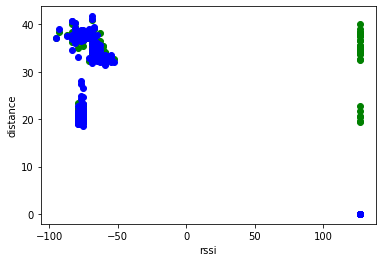

In [ ]:
plt.figure()
plt.scatter(df1['rssi'], df1['filtered'], color="g") # raw
plt.scatter(df1['rssi'], df1['raw'], color ="b")
plt.xlabel("rssi")
plt.ylabel("distance")
plt.show()

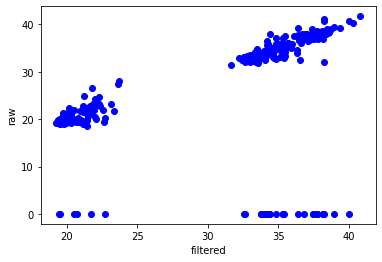

In [ ]:
plt.figure()
 
plt.scatter(df1['filtered'], df1['raw'], color ="b")
plt.xlabel("filtered")
plt.ylabel("raw")
plt.show()

In [ ]:
 df1['raw'].corr(df1['filtered'])
 

0.49356532731284064

$Z-Value$

In [ ]:
X = df1['raw']
Z = (X - X.mean(axis=0)) / X.std(axis=0)
Z


1     -1.000224
2     -1.233677
4     -1.198659
5     -1.116951
6     -1.223302
         ...   
345    0.151480
346    0.208547
347    0.253941
348    0.288959
349    0.274692
Name: raw, Length: 314, dtype: float64

filter는 iterable 자료에서 True 값만 남기고 False 값을 제거함 

In [ ]:
TH = 1.5
anomaly_detection = lambda x : abs(x) > TH

print (f"Z-value {Z}")
A = list(filter (anomaly_detection,Z))
print (f"Anomaly {A}")
print (f"Anomaly rate = {len(A)/len(X)}")

Z-value 1     -1.000224
2     -1.233677
4     -1.198659
5     -1.116951
6     -1.223302
         ...   
345    0.151480
346    0.208547
347    0.253941
348    0.288959
349    0.274692
Name: raw, Length: 314, dtype: float64
Anomaly [-1.5021489806185762, -1.519009516202131, -1.5475427302666092, -1.517712551926473, -1.541057908888319, -1.5086338019968666, -1.589045587087668, -1.555324515920558, -1.5254943375804217, -1.5462457659909512]
Anomaly rate = 0.03184713375796178


# 이상값 삭제

rssi 값이 100 이상를 이상치로 선택하여 검출함
> RSSI(Received Signal Strength Indicator)란 수신된 신호강도지표를 의미한다. RSSI는 보통 –99 dBm에서 35 dBm까지의 세기를 송출하며 숫자가 높을수록 신호의 강도가 강하다는 것을 의미한다

In [ ]:
len(df1[ df1['rssi'] > 100])

df1[ df1['rssi'] > 100].head()

,no,timestamp,node,error,raw,filtered,rssi
0,1,26806,00000000a3c3,2,0.0,NaN,127
3,4,28309,00000000a3c3,2,0.0,21.7078,127
17,18,35327,00000000a3c3,2,0.0,20.5029,127
29,30,41338,00000000a3c3,2,0.0,19.5349,127
43,44,48356,00000000a3c3,3,0.0,19.4317,127


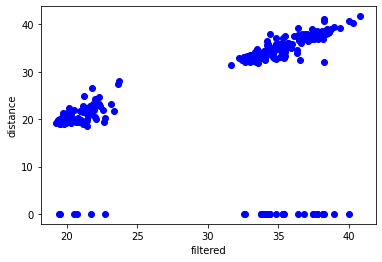

In [ ]:
plt.figure()
plt.scatter(df1['filtered'], df1['raw'], color ="b")
plt.xlabel("filtered")
plt.ylabel("distance")
plt.show()

In [ ]:
idxName = df1[ df1['rssi'] > 100].index
# Delete these row indexes from dataFrame
df1.drop(idxName , inplace=True)

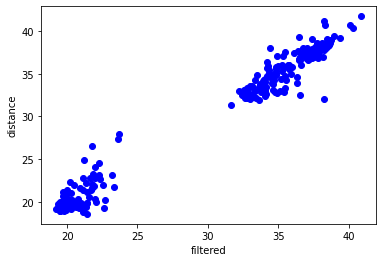

In [ ]:
plt.figure()
plt.scatter(df1['filtered'], df1['raw'], color ="b")
plt.xlabel("filtered")
plt.ylabel("distance")
plt.show()

음영지역

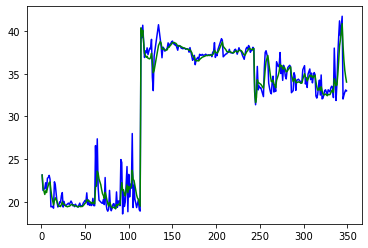

In [ ]:
plt.plot(df1['raw'], color ="b")
plt.plot(df1['filtered'], color ="g")


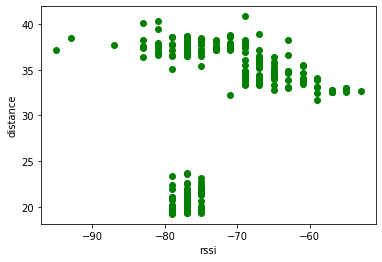

In [ ]:
plt.figure()
plt.scatter(df1['rssi'], df1['filtered'], color="g") # raw
plt.xlabel("rssi")
plt.ylabel("distance")
plt.show()

* row와 filtered는 양의 상관관계를 갖는다


In [ ]:
 df1['raw'].corr(df1['filtered'])

0.9899191220014115

In [ ]:
df2 = df1 [ ["rssi", "raw"]] 
df2


,rssi,raw
1,-75,23.16
2,-75,21.36
4,-77,21.63
5,-75,22.26
6,-79,21.44
...,...,...
345,-63,32.04
346,-63,32.48
347,-61,32.83
348,-61,33.10


In [ ]:
m = len(df2)

print (m)

314


* variance-covariance matrix

In [ ]:
df2.tail()

In [ ]:
s = np.sum(df2, axis=0)
mu = s/m
mu
vr = np.sum((df2 - mu)**2, axis=0)
variance = vr/m
variance

var_dia = np.diag(variance)
var_dia

array([[360.59917057,   0.        ],
       [  0.        ,  68.25969545]])

In [ ]:
k = len(mu)
X = df2 - mu
p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
p

 1      0.001014
 2      0.001014
 4      0.001014
 5      0.001014
 6      0.001014
          ...   
 346    0.001014
 347    0.001014
 348    0.001014
 349    0.001014
-1      0.001014
Length: 315, dtype: float64

In [ ]:
def probability(df):
    s = np.sum(df, axis=0)
    m = len(df)
    mu = s/m
    vr = np.sum((df - mu)**2, axis=0)
    variance = vr/m
    var_dia = np.diag(variance)
    k = len(mu)
    X = df - mu
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
    return p

In [ ]:
p1 = probability(df2)
p1

 1      0.001235
 2      0.001235
 4      0.001235
 5      0.001235
 6      0.001235
          ...   
 346    0.001235
 347    0.001235
 348    0.001235
 349    0.001235
-1      0.001235
Length: 315, dtype: float64

In [ ]:
print (f"p1 mean ={p1.mean()}")
eps = [i for i in p1 if i <= p1.mean()]
print (eps)
print (len(p1))
print (df2.size)

p1 mean =0.0031084289113620716
[0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.

In [ ]:
df2 = df1 [ ["rssi", "filtered"]] 
p1 = probability(df2)
print (f"p1 mean ={p1.mean()}")
eps = [i for i in p1 if i <= p1.mean()]
print (eps)
print (len(p1))
print (df2.size)

p1 mean =0.0031084289113620716
[0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.0031084289113620595, 0.

* Isolation Forest 
> an algorithm to detect outliers that returns the anomaly score of each sample using the IsolationForest algorithm

---
> https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1


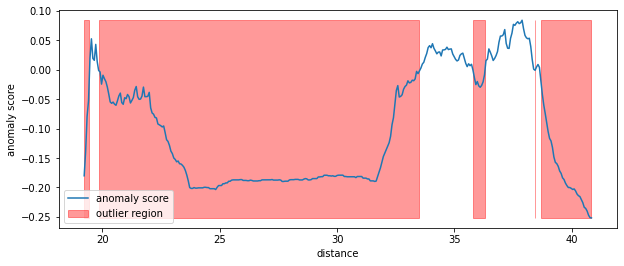

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df2['filtered'].values.reshape(-1, 1))
xx = np.linspace(df2['filtered'].min(), df2['filtered'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('distance')
plt.show();

K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)


In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

In [ ]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline


In [ ]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
X = np.array(df1[["filtered","filtered"]])
pipeline.fit(X)
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [ ]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

In [ ]:
from sklearn import svm
import numpy as np
from sklearn.svm import OneClassSVM

In [ ]:
clf = svm.OneClassSVM(nu = 0.1, kernel = "rbf", gamma = 0.1)

#X = np.array(df1[["raw","filtered"]])
X = np.array(df1[["raw","raw"]])
#X = np.array(df1[["filtered","filtered"]])

#X = arr.reshape(-1, 1)
clf.fit(X)

In [ ]:
pred = clf.predict(X)
#clf.score_samples(X)


In [ ]:
pred

In [ ]:
xx, yy = np.meshgrid(np.linspace(-1, 50, 100), np.linspace(-1, 50, 100))

In [ ]:
# plot the line, the points, and the nearest vectors to the plane
import pylab as pl

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

plt.contourf(xx, yy, Z)
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='blue', label='inliers', edgecolors="k")
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='red', label='outliers', edgecolors="k")
plt.axis('tight')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.4, min_samples = 10)
print(dbscan) 

pred = dbscan.fit_predict(X)
anom_index = np.where(pred == -1)
values = X[anom_index]

plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

sympy

In [ ]:
import sympy as sp

In [ ]:
sp.init_printing(use_latex=True)

In [ ]:
x = sp.symbols('x')
f = sp.symbols('f', cls=sp.Function) # 함수임을 나타냄
y = f(x)
eq = sp.Eq(x * sp.diff(y, x) + y, 2 * x)

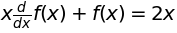

In [ ]:
eq

In [ ]:
sp.dsolve(eq, y)